# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [101]:
df= pd.read_csv('RTA_Dataset.csv')
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [103]:
df.shape

(12316, 32)

In [104]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [105]:
# Check for duplicate rows
duplicates = df.duplicated()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Optionally, display the duplicate rows
df[duplicates]


Number of duplicate rows: 0


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [106]:
# Handling missing values by replacing them with appropriate statistics

# For numerical columns, replace missing values with the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# For categorical columns, replace missing values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify that there are no missing values left
missing_values = df.isnull().sum()
print(f"Missing values after imputation: {missing_values.sum()}")
missing_values


Missing values after imputation: 0


Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [107]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

Min_Max_scaler = MinMaxScaler()

# Scale numerical columns
df[numerical_cols] = Min_Max_scaler.fit_transform(df[numerical_cols])

# Verify the scaling
df[numerical_cols].describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,0.173446,0.078307
std,0.114798,0.143883
min,0.000000,0.000000
25%,0.166667,0.000000
50%,0.166667,0.000000
75%,0.166667,0.142857
max,1.000000,1.000000


In [108]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
Standard_scaler = StandardScaler()

# Scale numerical columns
df[numerical_cols] = Standard_scaler.fit_transform(df[numerical_cols])

# Verify the scaling
df[numerical_cols].describe()


,Number_of_vehicles_involved,Number_of_casualties
count,1.231600e+04,1.231600e+04
mean,-5.538495e-17,6.000036e-17
std,1.000041e+00,1.000041e+00
min,-1.510942e+00,-5.442639e-01
25%,-5.906077e-02,-5.442639e-01
50%,-5.906077e-02,-5.442639e-01
75%,-5.906077e-02,4.486488e-01
max,7.200344e+00,6.406125e+00


In [109]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,420,1,0,1,0,0,0,0,3,3,...,2,3,2,5,3,0,2,5,9,2
1,420,1,1,1,4,0,3,11,3,2,...,2,3,2,5,3,0,2,5,16,2
2,420,1,0,1,4,0,0,5,3,5,...,2,0,1,1,2,0,2,5,0,1
3,594,3,0,1,4,0,2,11,0,5,...,2,2,0,0,2,0,2,5,1,2
4,594,3,0,1,4,0,1,0,3,2,...,2,3,2,5,3,0,2,5,16,2


In [121]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
# One-hot encode the categorical columns
one_hot = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# Add the new features to data_encoded
one_hot['Hour'] = df['Hour']
one_hot['Is_Weekend'] = df['Is_Weekend']
print(one_hot.head())

   Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0            1                   0              1                  0   
1            1                   1              1                  4   
2            1                   0              1                  4   
3            3                   0              1                  4   
4            3                   0              1                  4   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   0                0   
1                        0                   3               11   
2                        0                   0                5   
3                        0                   2               11   
4                        0                   1                0   

   Owner_of_vehicle  Service_year_of_vehicle  Defect_of_vehicle  ...  \
0                 3                        3                  2  ...   
1                 3 

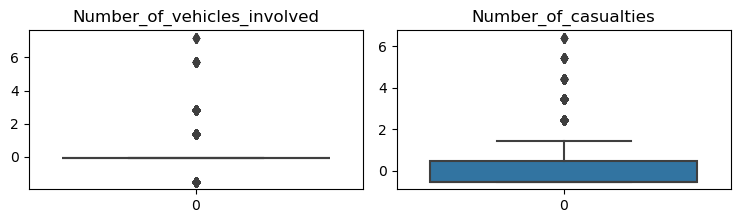

In [111]:
z_scores = np.abs(stats.zscore(df[numerical_cols]))
outliers_z_score = np.where(z_scores > 3)
# Detecting Outliers using IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))]
# Visualizing Outliers using Box Plot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(5, 4, i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()
# Treating Outliers by Capping to 5th and 95th percentiles
for col in numerical_cols:
    lower_cap = df[col].quantile(0.05)
    upper_cap = df[col].quantile(0.95)
    df[col] = np.where(df[col] < lower_cap, lower_cap, df[col])
    df[col] = np.where(df[col] > upper_cap, upper_cap, df[col])

In [112]:
# Alternatively, Treating Outliers by Trimming (Removing Outliers)
data_trimmed = df[(z_scores < 3).all(axis=1)]

# Verify the treatment
outliers_summary = {
    "Original Data Description": df.describe(),
    "Trimmed Data Description": data_trimmed.describe()
}
print(outliers_summary)
# Verify the treatment
original_data_summary = df.describe()
trimmed_data_summary = data_trimmed.describe()
print(original_data_summary)
print(trimmed_data_summary)

{'Original Data Description':                Time   Day_of_week  Age_band_of_driver  Sex_of_driver  \
count  12316.000000  12316.000000        12316.000000   12316.000000   
mean     504.737090      2.980513            1.292952       0.957535   
std      293.164211      2.059712            1.337520       0.263767   
min        0.000000      0.000000            0.000000       0.000000   
25%      280.000000      1.000000            0.000000       1.000000   
50%      463.000000      3.000000            1.000000       1.000000   
75%      711.250000      5.000000            2.000000       1.000000   
max     1073.000000      6.000000            4.000000       2.000000   

       Educational_level  Vehicle_driver_relation  Driving_experience  \
count       12316.000000             12316.000000        12316.000000   
mean            3.208347                 0.333793            1.943732   
std             1.361538                 0.741375            1.236146   
min             0.000000     

In [113]:
print(df['Time'].head())
# Assuming the 'Time' column is in a format that needs correction (e.g., 'HHMM')
# Correct the 'Time' format and extract hour
df['Time'] = df['Time'].apply(lambda x: '{:0>4}'.format(x))
df['Hour'] = df['Time'].str[:2].astype(int)

# Creating binary features for weekends and weekdays
df['Is_Weekend'] = df['Day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
pca = PCA(n_components=0.95)  # Retain 95% of variance
principal_components = pca.fit_transform(one_hot)
data_pca = pd.DataFrame(principal_components)

# Verify PCA transformation
pca_data_summary = data_pca.describe()
print(pca_data_summary) 

0    420
1    420
2    420
3    594
4    594
Name: Time, dtype: int32
                  0
count  1.231600e+04
mean   1.122468e-14
std    2.931643e+02
min   -5.047369e+02
25%   -2.247379e+02
50%   -4.173840e+01
75%    2.065149e+02
max    5.682630e+02


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

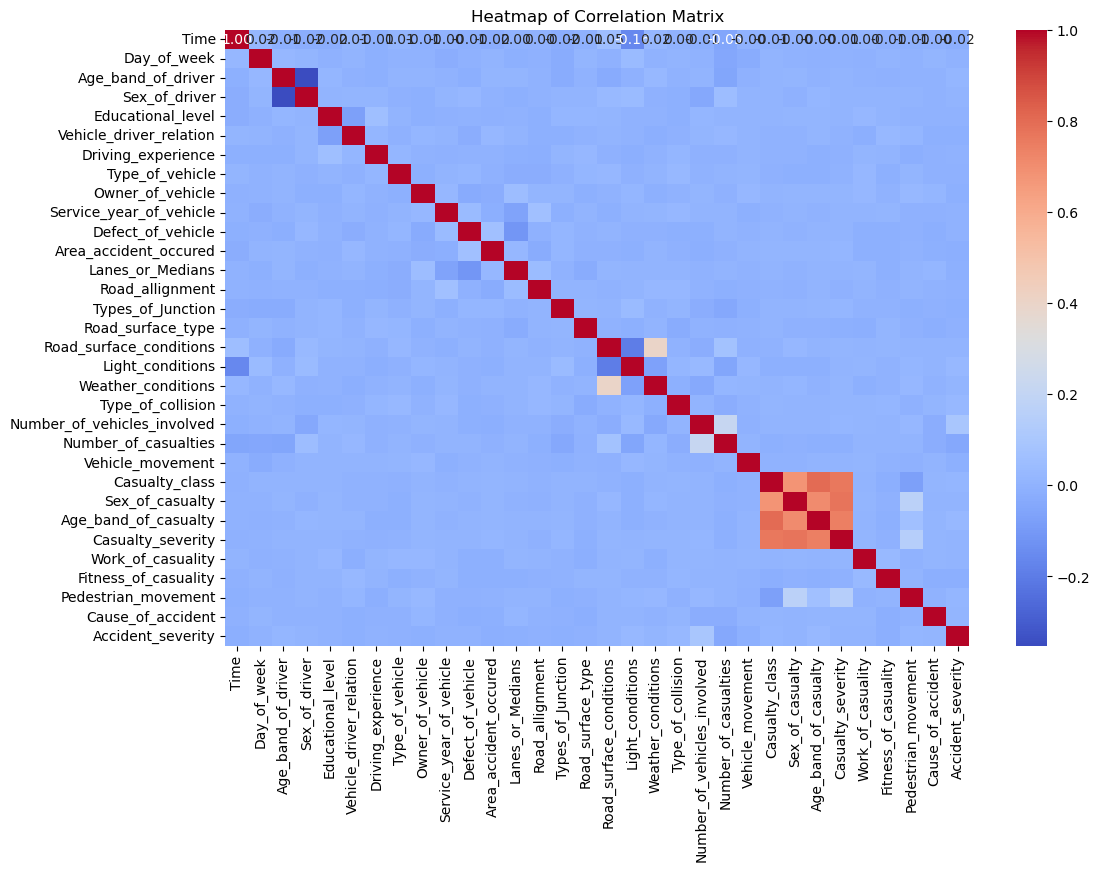

C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


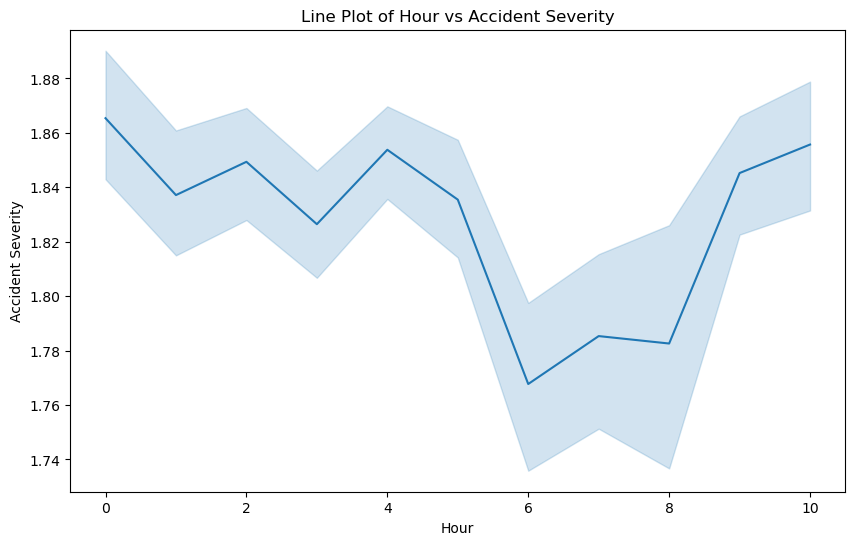

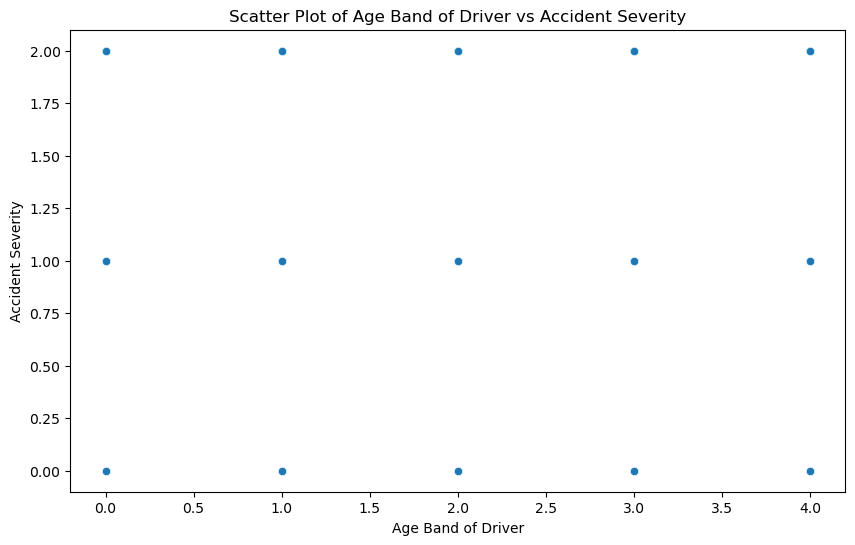

C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


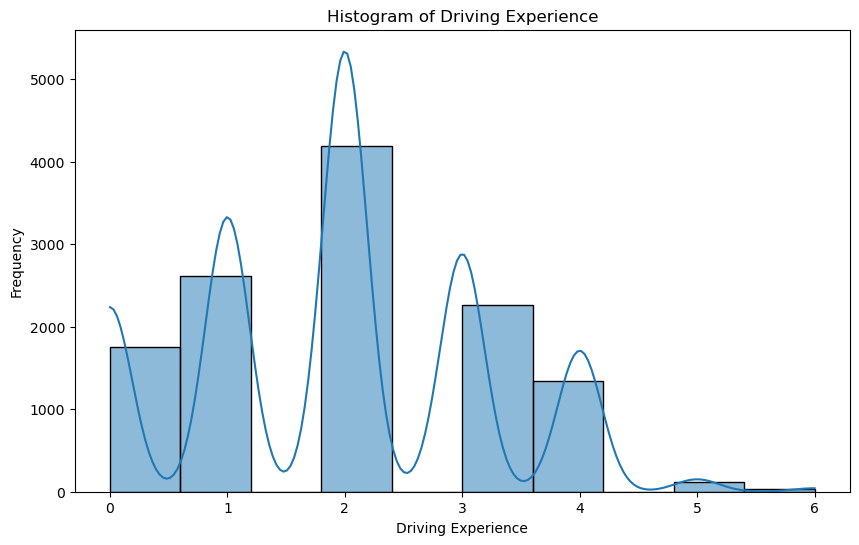

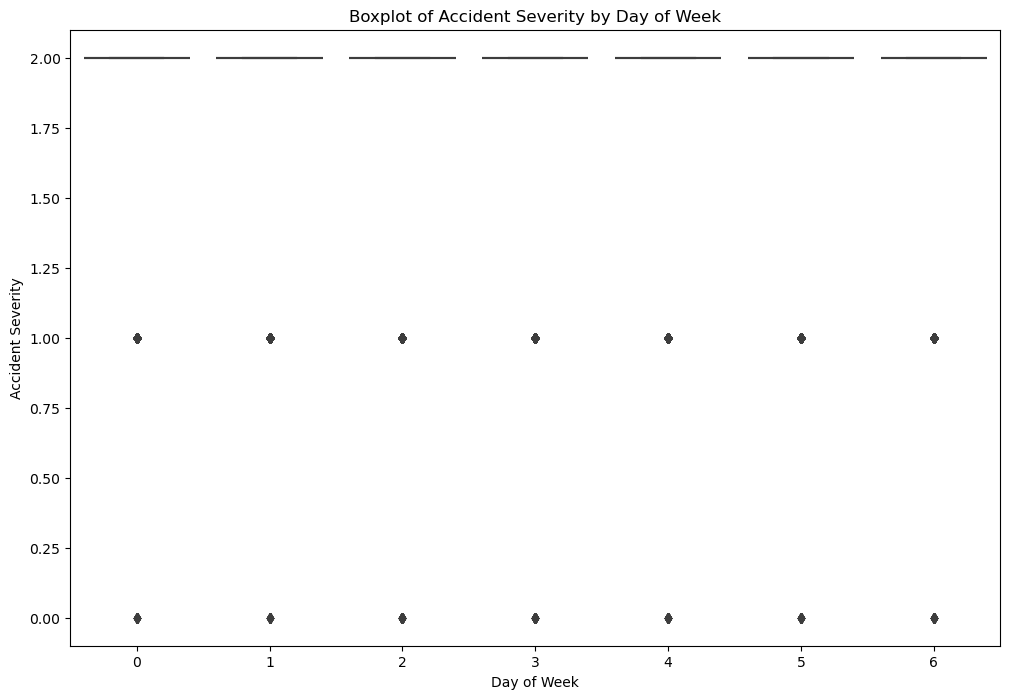

In [114]:
# 1. Heatmap of Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(one_hot.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# 2. Line Plot
# Example: Line plot of 'Hour' vs 'Accident_severity'
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Hour', y='Accident_severity')
plt.title('Line Plot of Hour vs Accident Severity')
plt.xlabel('Hour')
plt.ylabel('Accident Severity')
plt.show()

# 3. Scatter Plot
# Example: Scatter plot of 'Age_band_of_driver' vs 'Accident_severity'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age_band_of_driver', y='Accident_severity')
plt.title('Scatter Plot of Age Band of Driver vs Accident Severity')
plt.xlabel('Age Band of Driver')
plt.ylabel('Accident Severity')
plt.show()

# 4. Histograms
# Example: Histogram of 'Driving_experience'
plt.figure(figsize=(10, 6))
sns.histplot(df['Driving_experience'], bins=10, kde=True)
plt.title('Histogram of Driving Experience')
plt.xlabel('Driving Experience')
plt.ylabel('Frequency')
plt.show()

# 5. Boxplots
# Example: Boxplot of 'Accident_severity' by 'Day_of_week'
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Day_of_week', y='Accident_severity')
plt.title('Boxplot of Accident Severity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Accident Severity')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [115]:
# Calculate the correlation matrix
correlation_matrix = one_hot.corr()

# Filter the correlation matrix for correlations with the target variable
target_corr = correlation_matrix['Accident_severity'].sort_values(ascending=False)

# Display features with high correlation to the target variable
print(target_corr.head(10))
print(target_corr.tail(10))


Accident_severity              1.000000
Number_of_vehicles_involved    0.096023
Type_of_collision              0.025867
Light_conditions               0.025741
Age_band_of_casualty           0.025510
Casualty_class                 0.014075
Age_band_of_driver             0.013185
Pedestrian_movement            0.013082
Weather_conditions             0.010172
Cause_of_accident              0.008040
Name: Accident_severity, dtype: float64
Road_allignment           -0.005967
Types_of_Junction         -0.008861
Vehicle_movement          -0.010386
Owner_of_vehicle          -0.010960
Vehicle_driver_relation   -0.011253
Lanes_or_Medians          -0.011844
Fitness_of_casuality      -0.016218
Time                      -0.017020
Area_accident_occured     -0.018374
Number_of_casualties      -0.045339
Name: Accident_severity, dtype: float64


In [116]:
from sklearn.feature_selection import mutual_info_classif

# Extract features and target variable
X = one_hot.drop(columns=['Accident_severity'])
y = one_hot['Accident_severity']

# Calculate mutual information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame for mutual information
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Display the top features
print(mutual_info_df.head(10))


                        Feature  Mutual Information
0                          Time            0.076348
20  Number_of_vehicles_involved            0.018714
17             Light_conditions            0.007151
21         Number_of_casualties            0.006380
14            Types_of_Junction            0.005142
9       Service_year_of_vehicle            0.004918
4             Educational_level            0.004713
29          Pedestrian_movement            0.003667
8              Owner_of_vehicle            0.003521
1                   Day_of_week            0.003499


In [122]:
# Selected features based on correlation, visual insights, and mutual information
selected_features = [
    'Age_band_of_driver', 
    'Sex_of_driver', 
    'Educational_level', 
    'Driving_experience', 
    'Type_of_vehicle', 
    'Hour', 
    'Is_Weekend', 
    'Vehicle_driver_relation', 
    'Day_of_week', 
    'Owner_of_vehicle'
]

# Create a new DataFrame with selected features and the target variable
data_selected = one_hot[selected_features + ['Accident_severity']]

# Display the first few rows of the selected features dataset
data_selected.head()


,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Hour,Is_Weekend,Vehicle_driver_relation,Day_of_week,Owner_of_vehicle,Accident_severity
0,0,1,0,0,0,4,0,0,1,3,2
1,1,1,4,3,11,4,0,0,1,3,2
2,0,1,4,0,5,4,0,0,1,3,1
3,0,1,4,2,11,5,0,0,3,0,2
4,0,1,4,1,0,5,0,0,3,3,2


In [123]:
from sklearn.model_selection import train_test_split

# Extract features and target variable
X = data_selected.drop(columns=['Accident_severity'])
y = data_selected['Accident_severity']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)

Training shape: (9852, 10) (9852,)
Testing shape: (2464, 10) (2464,)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
# Initialize the model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

C:\Users\CovidVaccine-13\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [132]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
DTC = DecisionTreeClassifier()

# Train the model
DTC.fit(X_train, y_train)
y_pred_dtc = DTC.predict(X_test)

#### Support Vector Machine (SVM)

In [133]:
from sklearn.svm import SVC

# Initialize the model
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)


#### K-Neighbors Classifier

In [134]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
KNN = KNeighborsClassifier()

# Train the model
KNN.fit(X_train, y_train)

# Make predictions
y_pred_knn = KNN.predict(X_test)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

Logistic Regression Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85       145
           1       0.88      0.83      0.85       155

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

Confusion Matrix:
 [[127  18]
 [ 27 128]]
ROC AUC Score: 0.9141713014460511


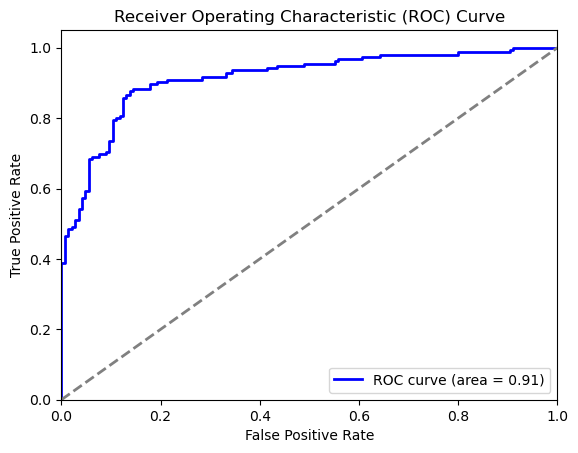

In [143]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.datasets import make_classification
# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Generate classification report and confusion matrix
report_logreg = classification_report(y_test, y_pred_logreg)
matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Print the evaluation metrics
print("Logistic Regression Accuracy:", accuracy_logreg)
print("Classification Report:\n", report_logreg)
print("Confusion Matrix:\n", matrix_logreg)

# Ensure the labels are binary (0 and 1)
y_test_binary = (y_test == 1).astype(int)
y_pred_logreg_binary = (y_pred_logreg == 1).astype(int)

# Get the predicted probabilities for the positive class
y_probs_logreg = log_reg.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test_binary, y_probs_logreg)

# Compute AUC
roc_auc_logreg = roc_auc_score(y_test_binary, y_probs_logreg)

print("ROC AUC Score:", roc_auc_logreg)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Decision Tree Classifier Accuracy: 0.8533333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       145
           1       0.87      0.84      0.86       155

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

Confusion Matrix:
 [[126  19]
 [ 25 130]]
ROC AUC Score: 0.8538375973303671


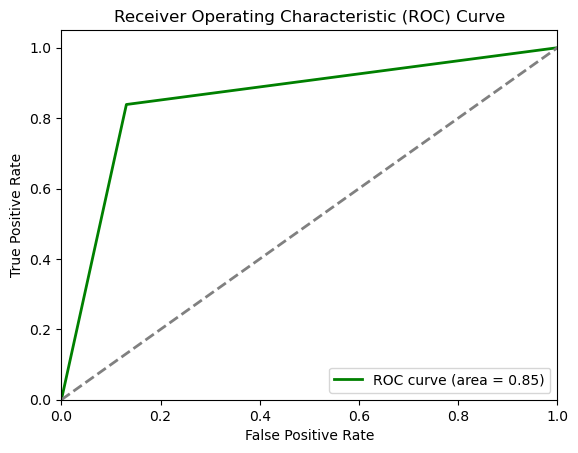

In [148]:



# Calculate accuracy
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)

# Generate classification report and confusion matrix
report_dtc = classification_report(y_test, y_pred_dtc)
matrix_dtc = confusion_matrix(y_test, y_pred_dtc)

# Print the evaluation metrics
print("Decision Tree Classifier Accuracy:", accuracy_dtc)
print("Classification Report:\n", report_dtc)
print("Confusion Matrix:\n", matrix_dtc)

# Ensure the labels are binary (0 and 1)
y_test_binary = (y_test == 1).astype(int)
y_pred_dtc_binary = (y_pred_dtc == 1).astype(int)

# Get the predicted probabilities for the positive class
y_probs_dtc = DTC.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test_binary, y_probs_dtc)

# Compute AUC
roc_auc_dtc = roc_auc_score(y_test_binary, y_probs_dtc)

# Print the AUC
print("ROC AUC Score:", roc_auc_dtc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_dtc, tpr_dtc, color='green', lw=2, label=f'ROC curve (area = {roc_auc_dtc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


SVM Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       145
           1       0.86      0.81      0.83       155

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

Confusion Matrix:
 [[124  21]
 [ 29 126]]
SVM ROC AUC Score: 0.9111679644048943


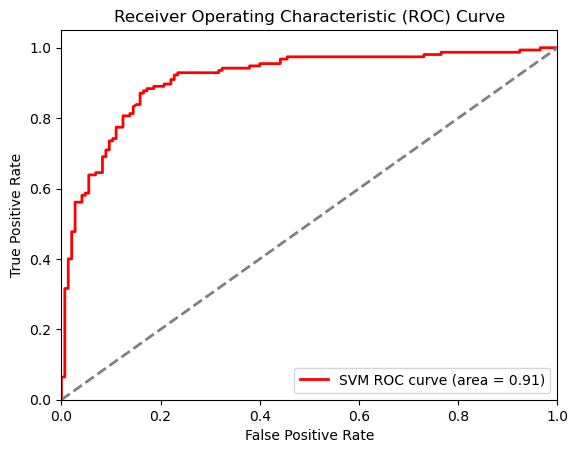

In [151]:

# Calculate accuracy for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Generate classification report and confusion matrix for SVM
report_svm = classification_report(y_test, y_pred_svm)
matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print the evaluation metrics for SVM
print("SVM Accuracy:", accuracy_svm)
print("Classification Report:\n", report_svm)
print("Confusion Matrix:\n", matrix_svm)

# Get the predicted probabilities for the positive class for SVM
y_probs_svm = svm.predict_proba(X_test)[:, 1]

# Compute the ROC curve for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_binary, y_probs_svm)

# Compute AUC for SVM
roc_auc_svm = roc_auc_score(y_test_binary, y_probs_svm)

# Print the AUC for SVM
print("SVM ROC AUC Score:", roc_auc_svm)

# Plot the ROC curve for SVM
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


K-Nearest Neighbors Accuracy: 0.8033333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       145
           1       0.85      0.75      0.80       155

    accuracy                           0.80       300
   macro avg       0.81      0.81      0.80       300
weighted avg       0.81      0.80      0.80       300

Confusion Matrix:
 [[124  21]
 [ 38 117]]
K-Nearest Neighbors ROC AUC Score: 0.8735706340378198


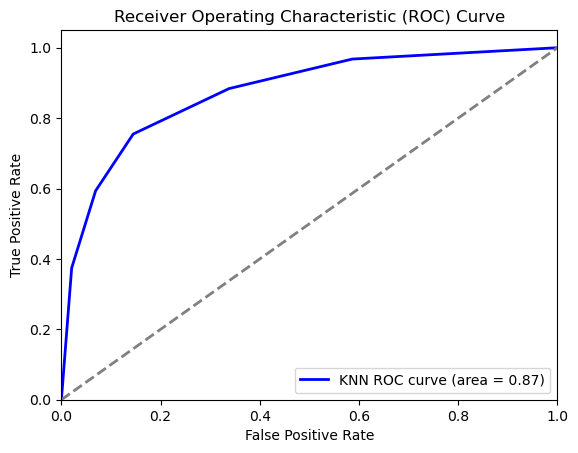

In [153]:
# Calculate accuracy for KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Generate classification report and confusion matrix for KNN
report_knn = classification_report(y_test, y_pred_knn)
matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Print the evaluation metrics for KNN
print("K-Nearest Neighbors Accuracy:", accuracy_knn)
print("Classification Report:\n", report_knn)
print("Confusion Matrix:\n", matrix_knn)

# Get the predicted probabilities for the positive class for KNN
y_probs_knn = KNN.predict_proba(X_test)[:, 1]

# Compute the ROC curve for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_binary, y_probs_knn)

# Compute AUC for KNN
roc_auc_knn = roc_auc_score(y_test_binary, y_probs_knn)

# Print the AUC for KNN
print("K-Nearest Neighbors ROC AUC Score:", roc_auc_knn)

# Plot the ROC curve for KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:
###Logistic Regression:

Accuracy: 0.85
Precision (class 1): 0.88
Recall (class 1): 0.83
ROC AUC Score: 0.9141

###Decision Tree:

Accuracy: 0.85
Precision (class 1): 0.87
Recall (class 1): 0.84
ROC AUC Score: 0.8538

###SVM:

Accuracy: 0.83
Precision (class 1): 0.86
Recall (class 1): 0.81
ROC AUC Score: 0.9112

###K-Nearest Neighbors:

Accuracy: 0.80
Precision (class 1): 0.85
Recall (class 1): 0.75
ROC AUC Score: 0.8736
Evaluate Trade-offs


##Decision Tree:##

Pros: Easy to understand, works well with different data types.
Cons: Can overfit easily.

##SVM:##

Pros: Good for high-dimensional data.
Cons: Slow and hard to understand.
##KNN:##

Pros: Simple and easy to use.
Cons: Slow at prediction time and needs scaling.
##Logistic Regression:##

Pros: Simple, fast, and interpretable.
Cons: Assumes linear relationships.
Justify Your Choice
Best Model: Logistic Regression

Why: It has the highest ROC AUC score (0.9141), meaning it’s best at distinguishing between classes. It's also fast and easy to understand.
Feature Importance
For Logistic Regression, the importance of features can be seen from the model coefficients. Bigger absolute values mean more important features.

Model Limitations
Logistic Regression:

Limitations: Assumes linearity and sensitive to outliers.
Decision Tree:

Limitations: Can overfit without tuning.
SVM:

Limitations: Computationally heavy and hard to interpret.
KNN:

Limitations: Slow at prediction and sensitive to irrelevant features.
Future Improvements
Try New Models: Use Random Forest or Gradient Boosting.
Better Features: Create new features and use PCA.
Tune Parameters: Use grid search or random search.
Validate Well: Use cross-validation for better estimates.
Fix Data Issues: Handle outliers and normalize data.


Conclusion
Logistic Regression is the best choice here because it has the best balance of performance, speed, and simplicity. Future work can focus on trying new models and tuning parameters to improve further.